In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_excel('ecom-data.xlsx')

In [3]:
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


# Understanding the data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CustomerID,5630.0,52815.500000,1625.385339,50001.0,51408.25,52815.50,54222.7500,55630.00
Churn,5630.0,0.168384,0.374240,0.0,0.00,0.00,0.0000,1.00
Tenure,5366.0,10.189899,8.557241,0.0,2.00,9.00,16.0000,61.00
CityTier,5630.0,1.654707,0.915389,1.0,1.00,1.00,3.0000,3.00
WarehouseToHome,5379.0,15.639896,8.531475,5.0,9.00,14.00,20.0000,127.00
HourSpendOnApp,5375.0,2.931535,0.721926,0.0,2.00,3.00,3.0000,5.00
NumberOfDeviceRegistered,5630.0,3.688988,1.023999,1.0,3.00,4.00,4.0000,6.00
SatisfactionScore,5630.0,3.066785,1.380194,1.0,2.00,3.00,4.0000,5.00
NumberOfAddress,5630.0,4.214032,2.583586,1.0,2.00,3.00,6.0000,22.00
Complain,5630.0,0.284902,0.451408,0.0,0.00,0.00,1.0000,1.00


In [6]:
percent_of_null_values = ((df.isnull().sum())*100/len(df)).sort_values(ascending = False)
percent_of_null_values

DaySinceLastOrder              5.452931
OrderAmountHikeFromlastYear    4.706927
Tenure                         4.689165
OrderCount                     4.582593
CouponUsed                     4.547069
HourSpendOnApp                 4.529307
WarehouseToHome                4.458259
CustomerID                     0.000000
MaritalStatus                  0.000000
Complain                       0.000000
NumberOfAddress                0.000000
PreferedOrderCat               0.000000
SatisfactionScore              0.000000
Churn                          0.000000
NumberOfDeviceRegistered       0.000000
Gender                         0.000000
PreferredPaymentMode           0.000000
CityTier                       0.000000
PreferredLoginDevice           0.000000
CashbackAmount                 0.000000
dtype: float64

    7 columns have null values and all of them contain null value below 6%

In [7]:
df['Churn'].value_counts()

0    4682
1     948
Name: Churn, dtype: int64

    This shows the data is imbalanced

In [8]:
#Separating numerical features excluding 'CustomerID','Churn' and 'CityTier', since they are unique.
numerical_features=[feature for feature in df.columns if df[feature].dtype!=object and feature not in ['CustomerID','Churn','CityTier']]
numerical_features

['Tenure',
 'WarehouseToHome',
 'HourSpendOnApp',
 'NumberOfDeviceRegistered',
 'SatisfactionScore',
 'NumberOfAddress',
 'Complain',
 'OrderAmountHikeFromlastYear',
 'CouponUsed',
 'OrderCount',
 'DaySinceLastOrder',
 'CashbackAmount']

In [9]:
#Separating Categorical Columns
cat_features=[features for features in df.columns if features not in (numerical_features and ['CustomerID'])]

# EDA

# 1. Univariate Analysis

array([[<AxesSubplot:title={'center':'Tenure'}>,
        <AxesSubplot:title={'center':'WarehouseToHome'}>,
        <AxesSubplot:title={'center':'HourSpendOnApp'}>],
       [<AxesSubplot:title={'center':'NumberOfDeviceRegistered'}>,
        <AxesSubplot:title={'center':'SatisfactionScore'}>,
        <AxesSubplot:title={'center':'NumberOfAddress'}>],
       [<AxesSubplot:title={'center':'Complain'}>,
        <AxesSubplot:title={'center':'OrderAmountHikeFromlastYear'}>,
        <AxesSubplot:title={'center':'CouponUsed'}>],
       [<AxesSubplot:title={'center':'OrderCount'}>,
        <AxesSubplot:title={'center':'DaySinceLastOrder'}>,
        <AxesSubplot:title={'center':'CashbackAmount'}>]], dtype=object)

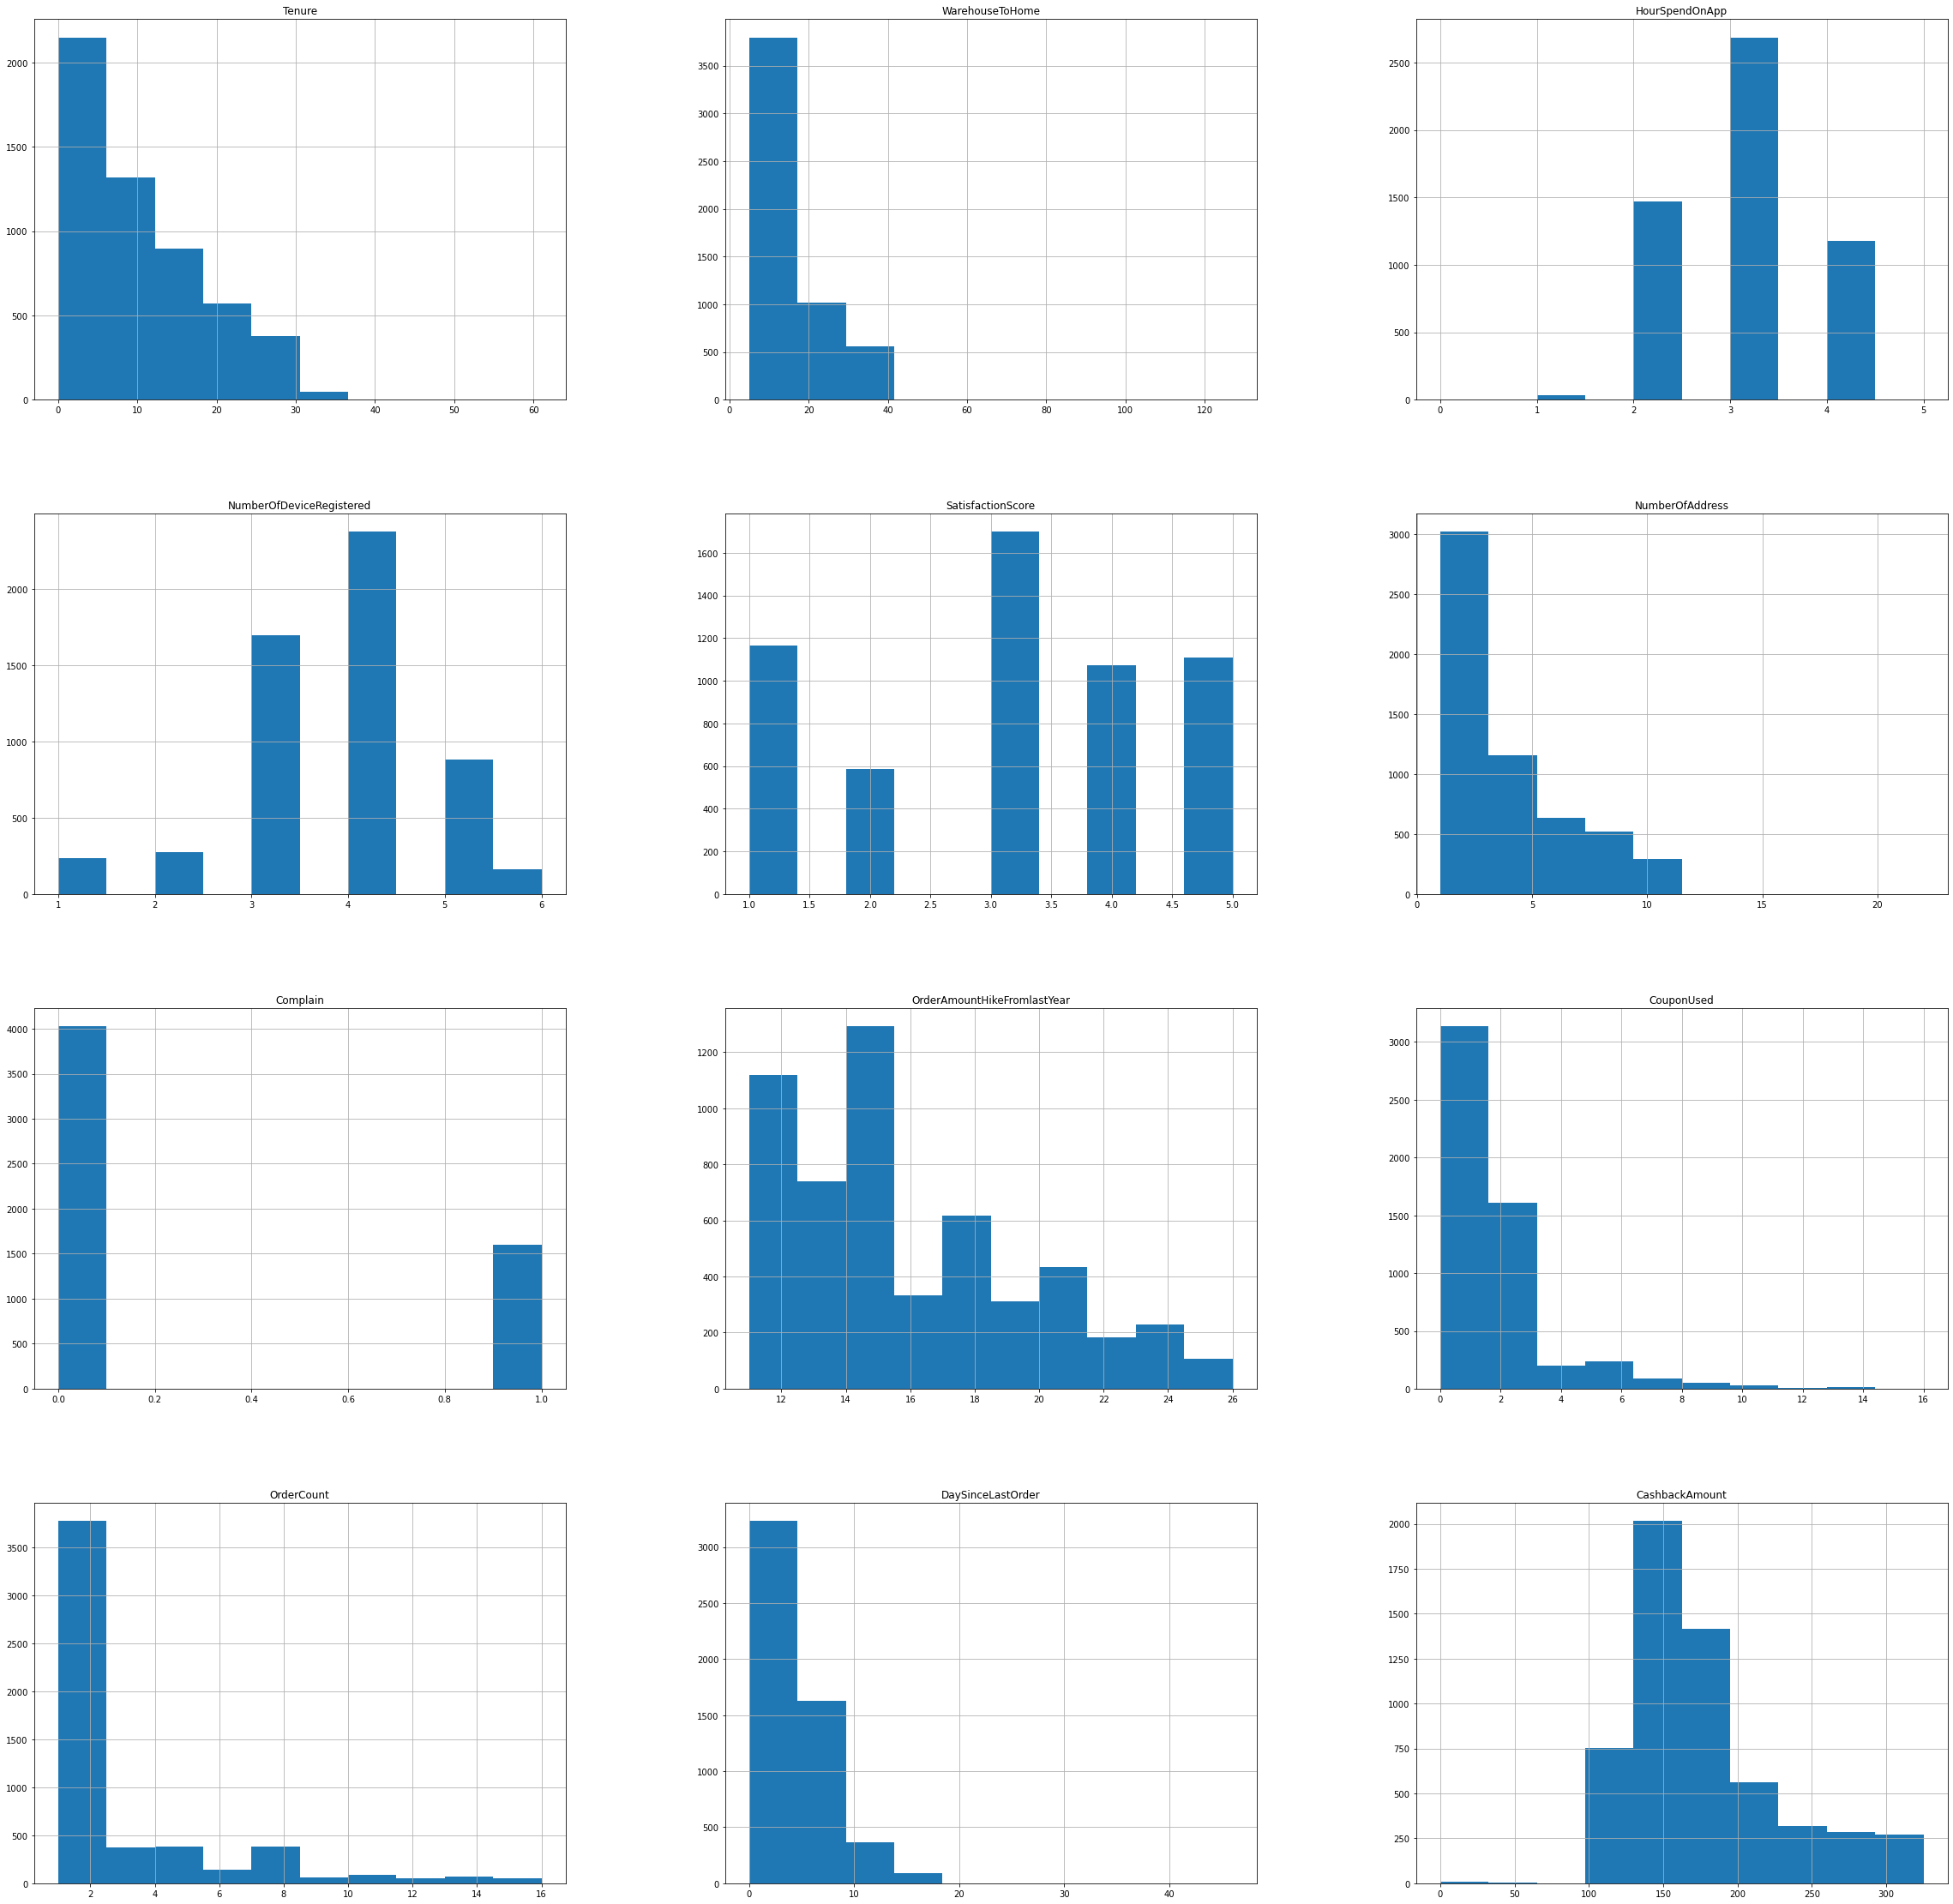

In [10]:
#Analysing numerical columns.
df[numerical_features].hist(figsize=(40,40))

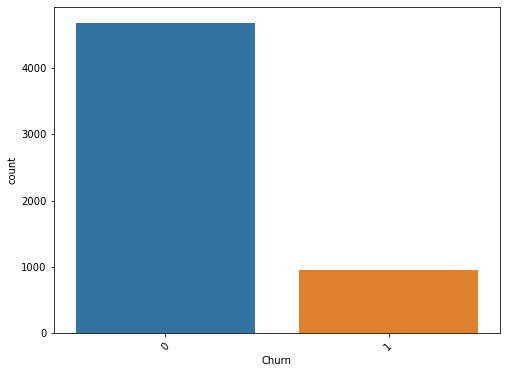

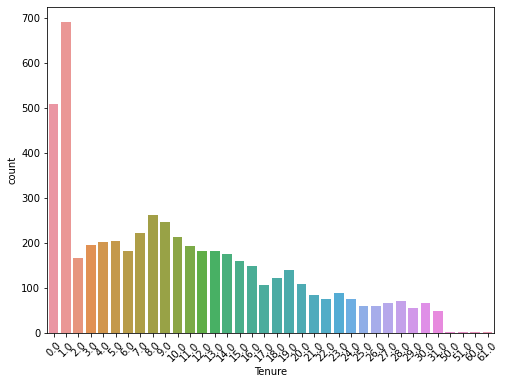

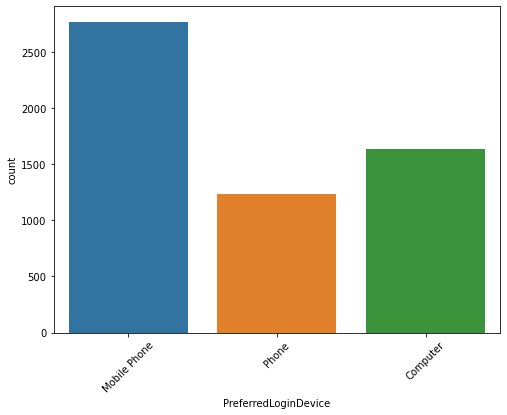

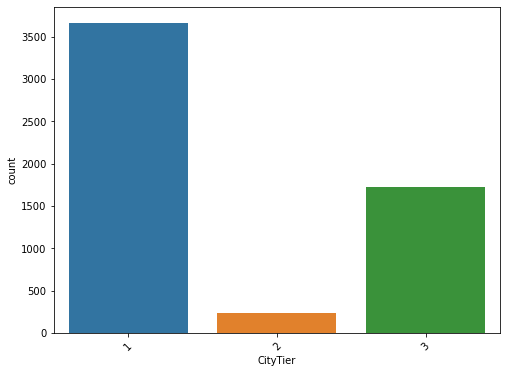

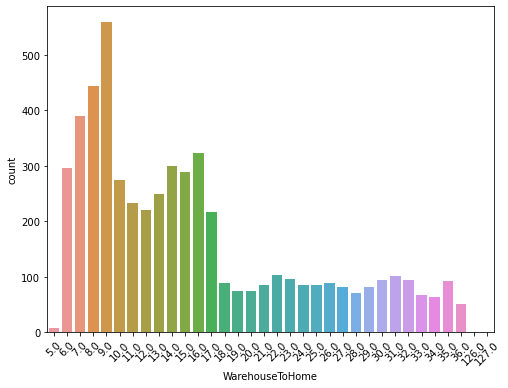

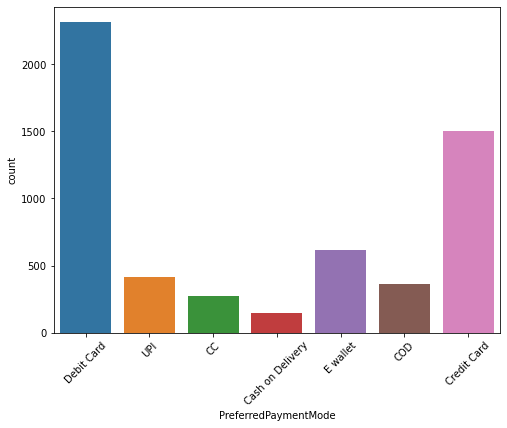

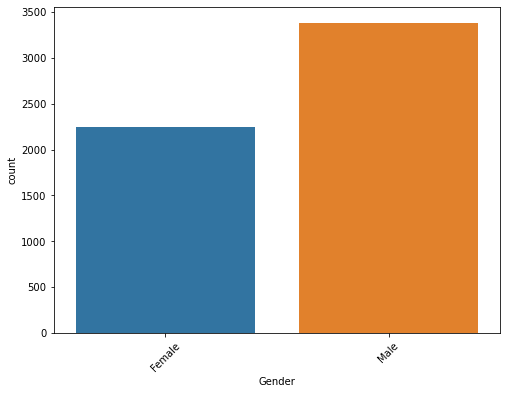

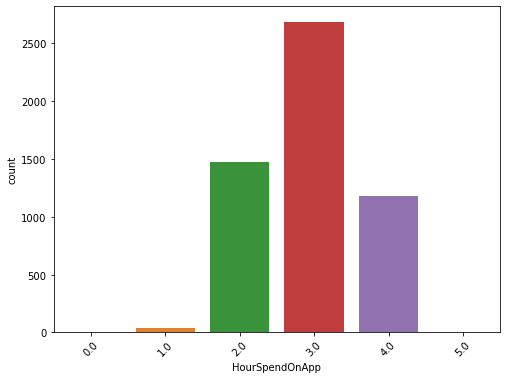

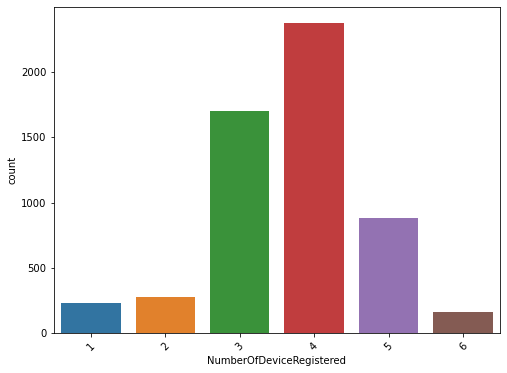

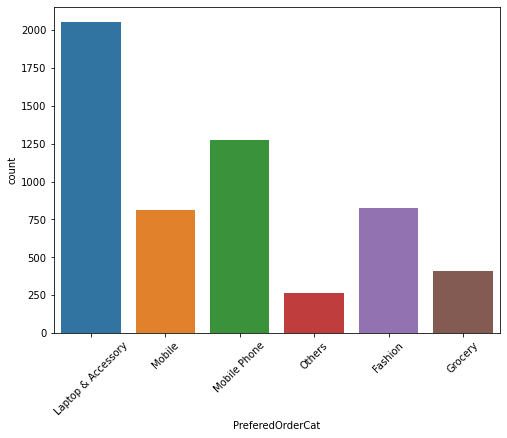

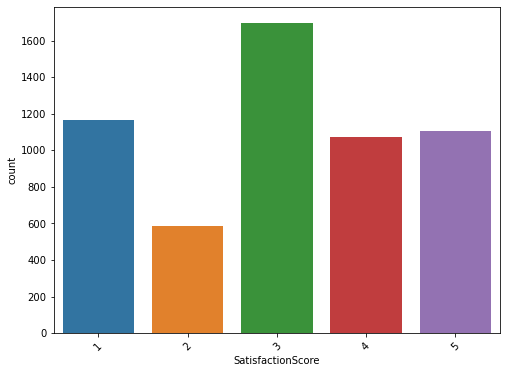

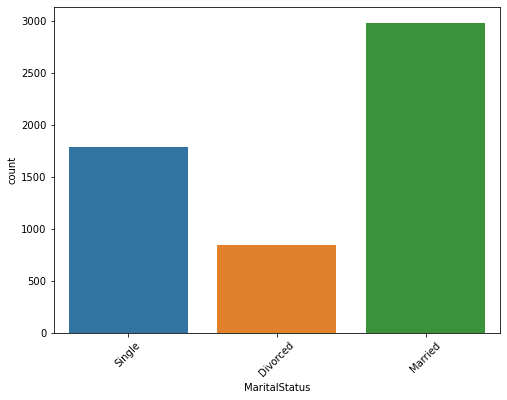

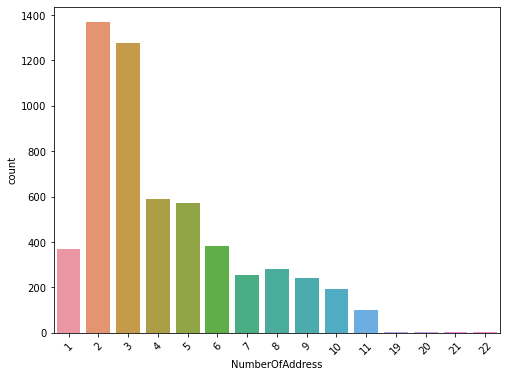

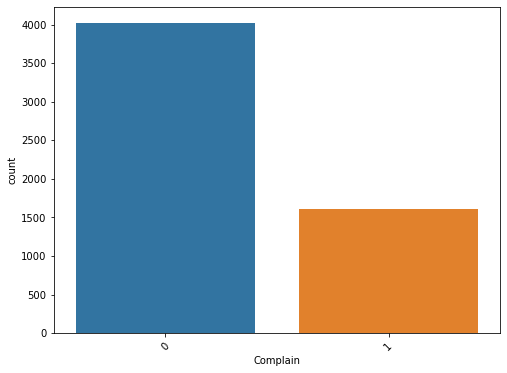

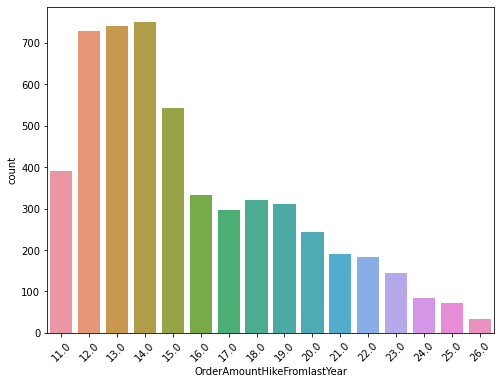

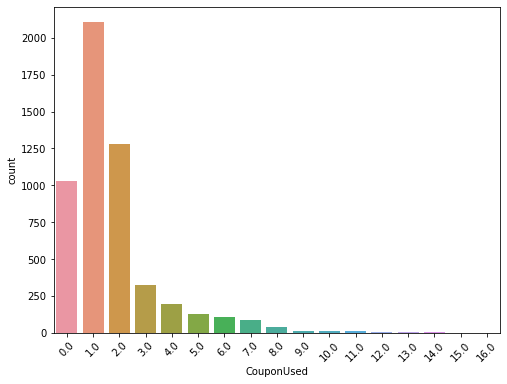

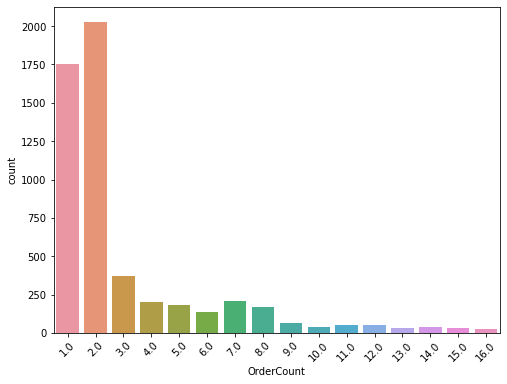

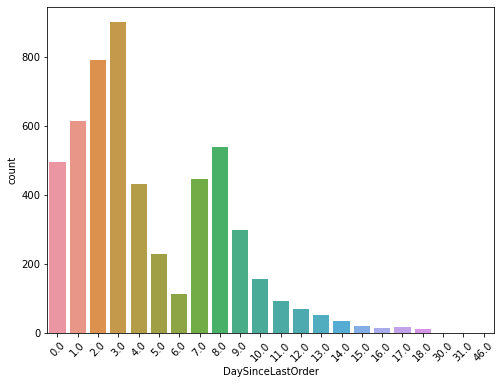

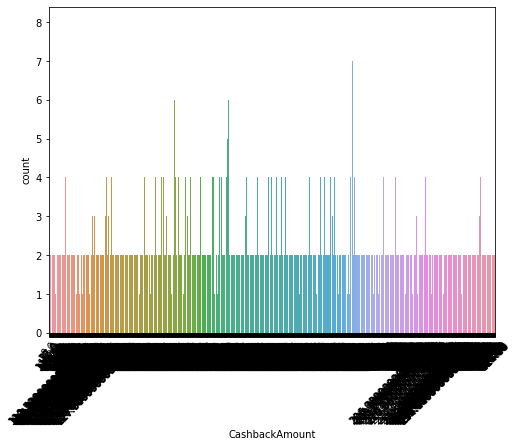

In [11]:
#Analysing Categorical columns.
for feature in cat_features:
    plt.figure(figsize=(8,6))
    ax = sns.countplot(x=feature, data=df,)
    plt.xticks(rotation=45)
    plt.show()

    Inference
    1.Churn count is less comparatively.
    2.Customers use phones mostly than computer for purchasing.
    3.Most customers prefer payment using Debit Card. 
    4.Male cutomers are more in number.
    5.Customers spend an average of 3 hours in app.
    6.Most customers buy Laptops and accessories using this app.
    7.Most customers have no complains.
    8.Most customers have used at least one coupon.

#  2. Bivariate Analysis

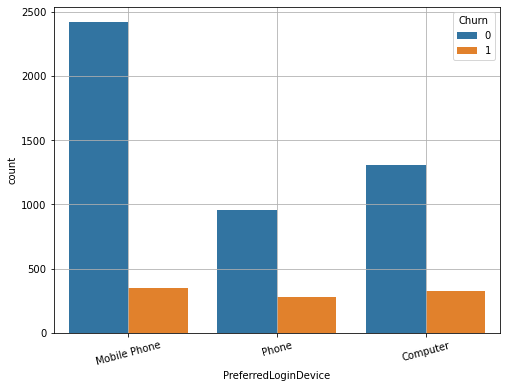

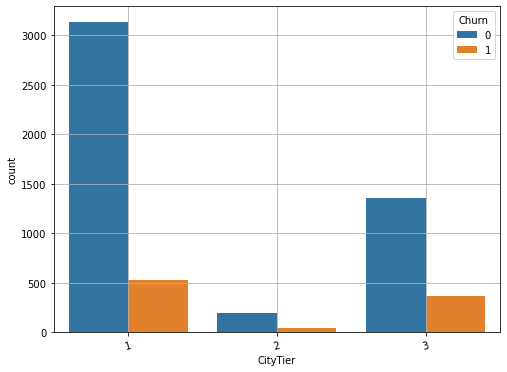

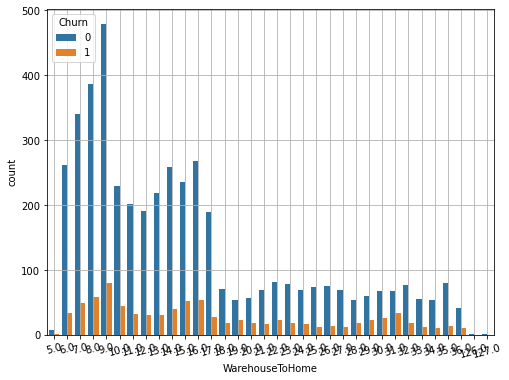

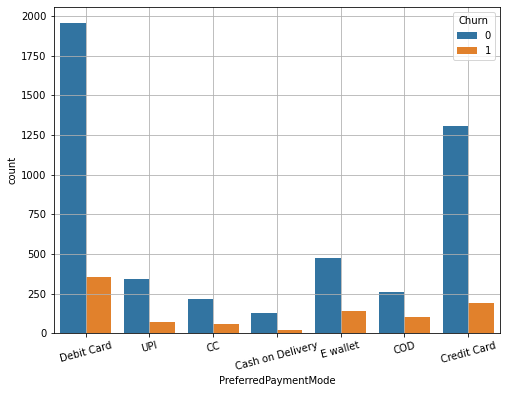

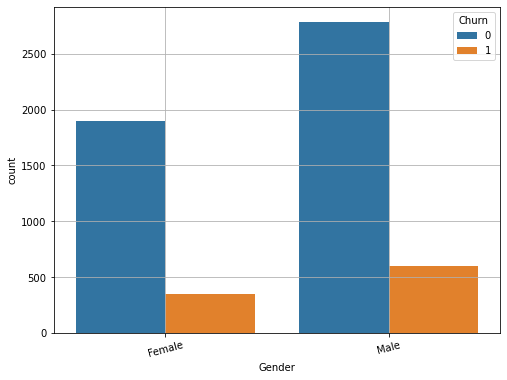

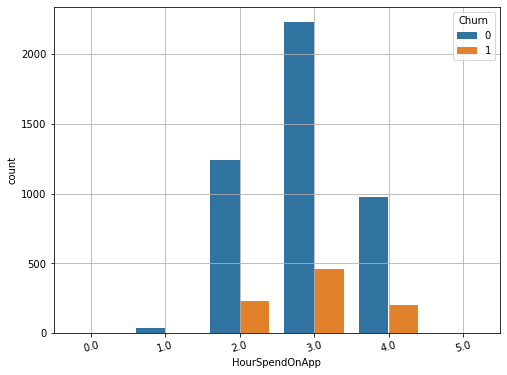

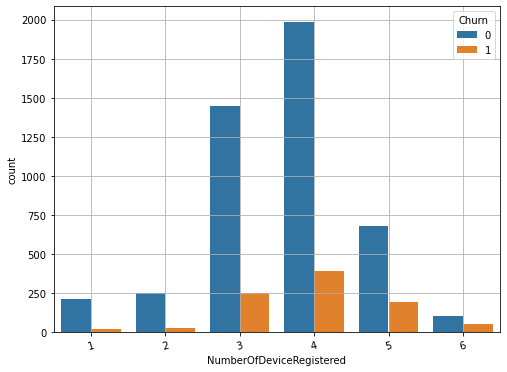

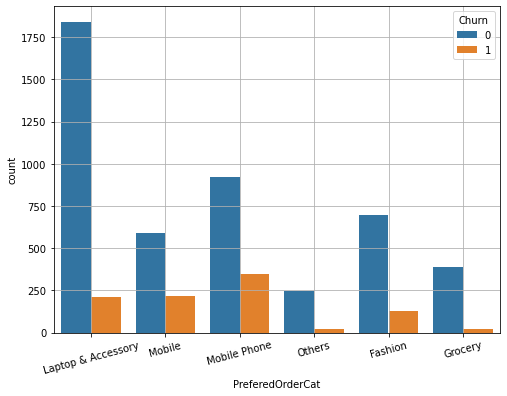

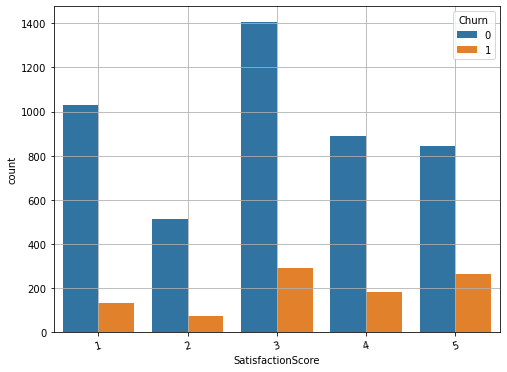

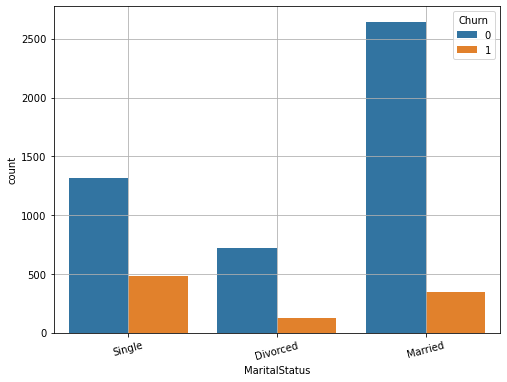

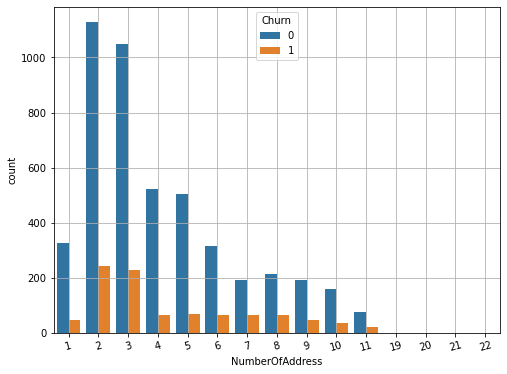

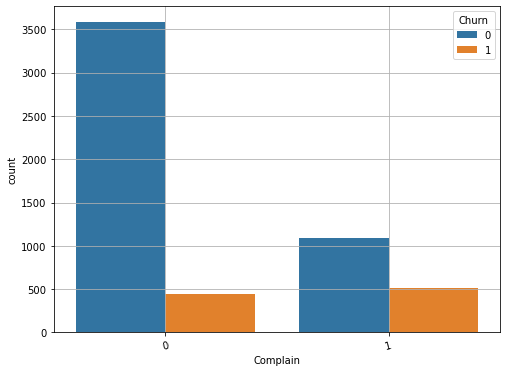

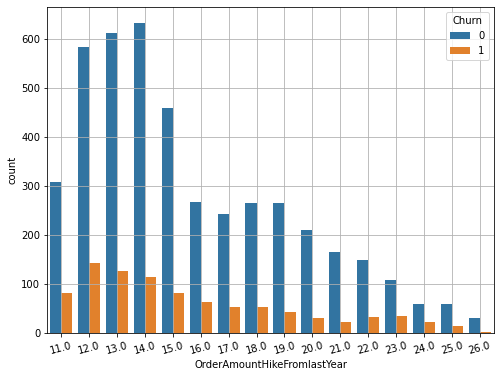

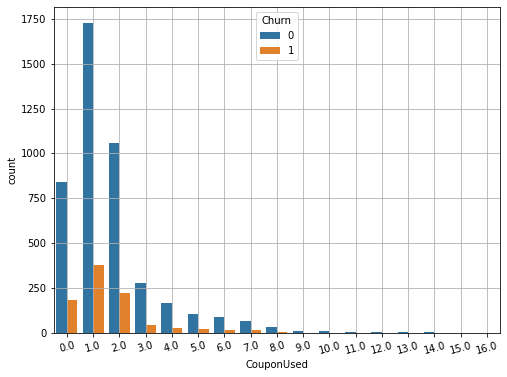

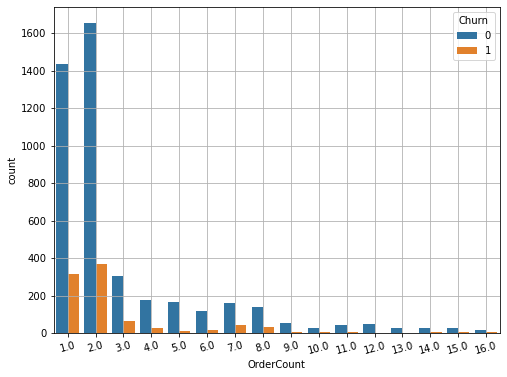

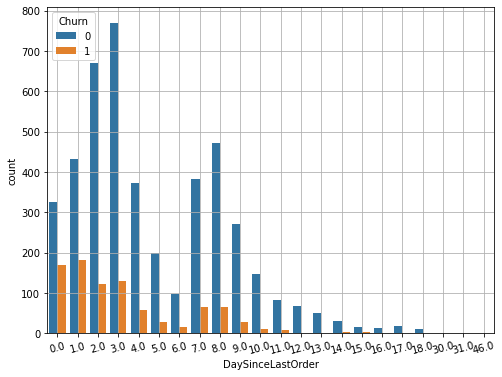

In [12]:
for feature in cat_features:
    if(feature not in ['Churn','Tenure','WareHouseToHome','CashbackAmount']):
        plt.figure(figsize=(8,6))
        sns.countplot(data=df,x=feature,hue='Churn')
        plt.grid()
        plt.xticks(rotation=15)
        plt.show()

    1. Churned customers are mostly from CityTier 1.
    2. Churned customers are mostly Debit Card users.
    3. Churned customers are mostly satisfied with the app. The satisfaction score shows that.
        Maybe because of some other reason, such as phone lost, phone complaint, etc., they may be listed as churned.

<AxesSubplot:>

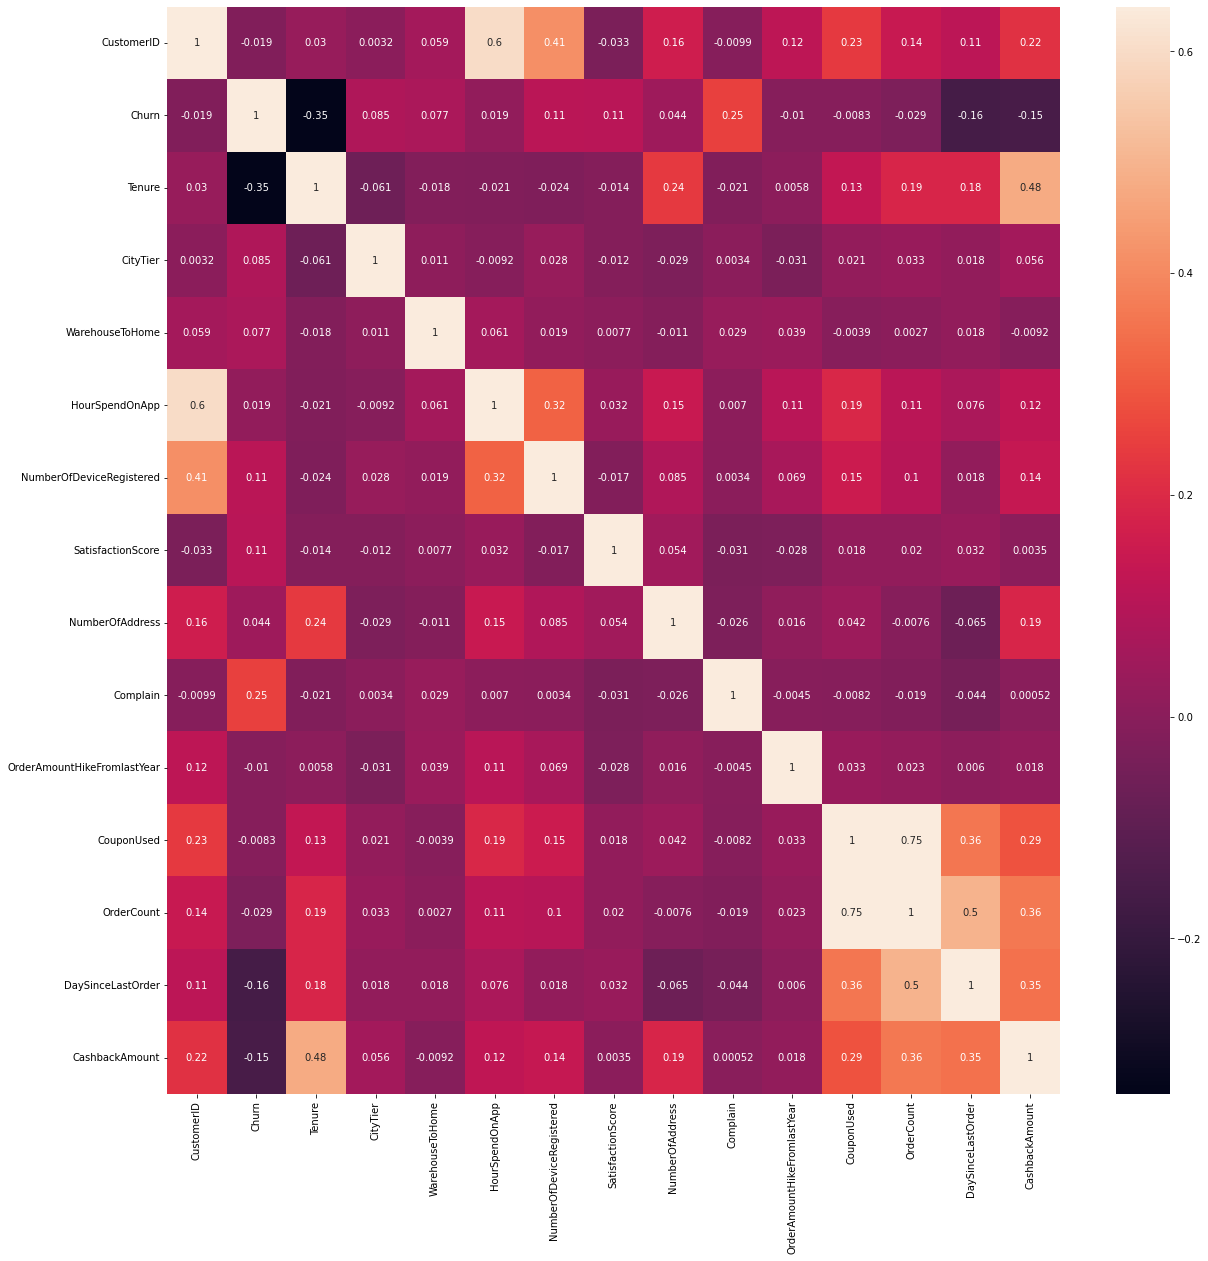

In [13]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), vmax=0.64, vmin=-0.34 ,annot=True)

    There is no strong correlation between features.

# Preprocessing 

# 1. Missing Values

In [14]:
#Listing all columns with null values
features_with_na=[features for features in df.columns if df[features].isna().sum()>0]
features_with_na

['Tenure',
 'WarehouseToHome',
 'HourSpendOnApp',
 'OrderAmountHikeFromlastYear',
 'CouponUsed',
 'OrderCount',
 'DaySinceLastOrder']

In [15]:
df[features_with_na].nunique()

Tenure                         36
WarehouseToHome                34
HourSpendOnApp                  6
OrderAmountHikeFromlastYear    16
CouponUsed                     17
OrderCount                     16
DaySinceLastOrder              22
dtype: int64

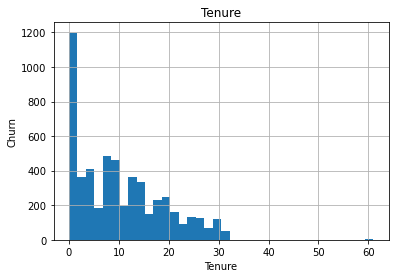

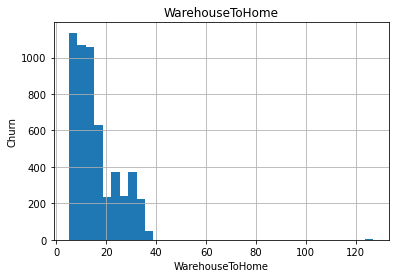

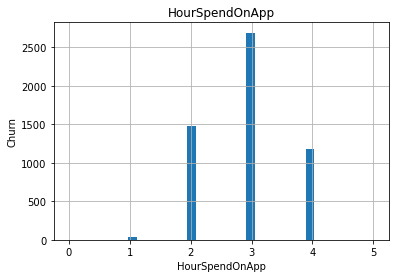

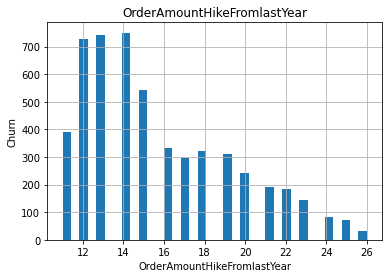

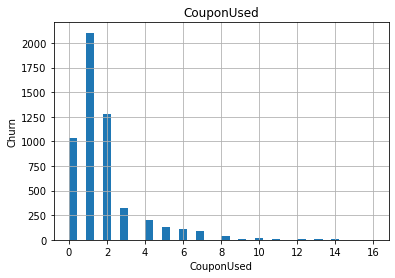

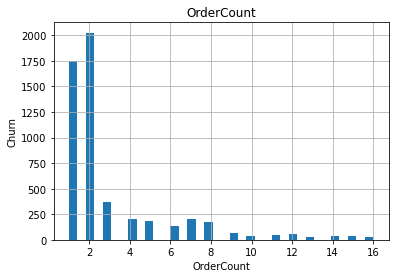

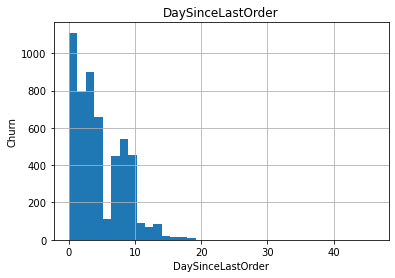

In [16]:
for features in features_with_na:
    data =df.copy()
    data[features].hist(bins=36)
    plt.xlabel(features)
    plt.ylabel('Churn')
    plt.title(features)
    plt.show()

In [17]:
df[features_with_na].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Tenure,5366.0,10.189899,8.557241,0.0,2.0,9.0,16.0,61.0
WarehouseToHome,5379.0,15.639896,8.531475,5.0,9.0,14.0,20.0,127.0
HourSpendOnApp,5375.0,2.931535,0.721926,0.0,2.0,3.0,3.0,5.0
OrderAmountHikeFromlastYear,5365.0,15.707922,3.675485,11.0,13.0,15.0,18.0,26.0
CouponUsed,5374.0,1.751023,1.894621,0.0,1.0,1.0,2.0,16.0
OrderCount,5372.0,3.008004,2.939680,1.0,1.0,2.0,3.0,16.0
DaySinceLastOrder,5323.0,4.543491,3.654433,0.0,2.0,3.0,7.0,46.0


    Inference
    Columns with missing values are not normally distributed. That is, they are skewed.
    Also, mean and median are almost same for them.
    Therefore, we replace the missing values with median.

In [18]:
for features in features_with_na:
    df[features]=df[features].fillna(df[features].median())
    
df[features_with_na].isna().sum()

Tenure                         0
WarehouseToHome                0
HourSpendOnApp                 0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
dtype: int64

In [19]:
df[features_with_na].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Tenure,5630.0,10.134103,8.357951,0.0,3.0,9.0,15.0,61.0
WarehouseToHome,5630.0,15.566785,8.345961,5.0,9.0,14.0,20.0,127.0
HourSpendOnApp,5630.0,2.934636,0.705528,0.0,2.0,3.0,3.0,5.0
OrderAmountHikeFromlastYear,5630.0,15.674600,3.591058,11.0,13.0,15.0,18.0,26.0
CouponUsed,5630.0,1.716874,1.857640,0.0,1.0,1.0,2.0,16.0
OrderCount,5630.0,2.961812,2.879248,1.0,1.0,2.0,3.0,16.0
DaySinceLastOrder,5630.0,4.459325,3.570626,0.0,2.0,3.0,7.0,46.0


# 2.Handling Outliers

In [20]:
df[numerical_features].nunique()

Tenure                           36
WarehouseToHome                  34
HourSpendOnApp                    6
NumberOfDeviceRegistered          6
SatisfactionScore                 5
NumberOfAddress                  15
Complain                          2
OrderAmountHikeFromlastYear      16
CouponUsed                       17
OrderCount                       16
DaySinceLastOrder                22
CashbackAmount                 2586
dtype: int64

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


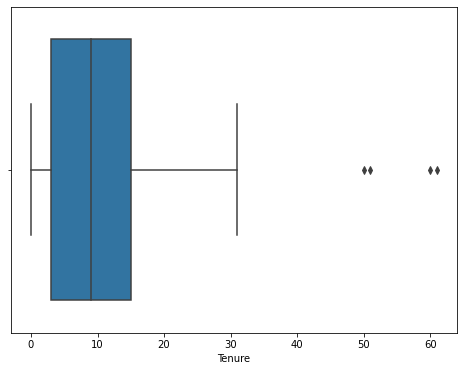

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


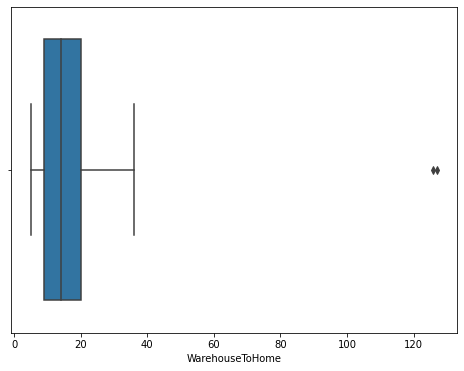

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


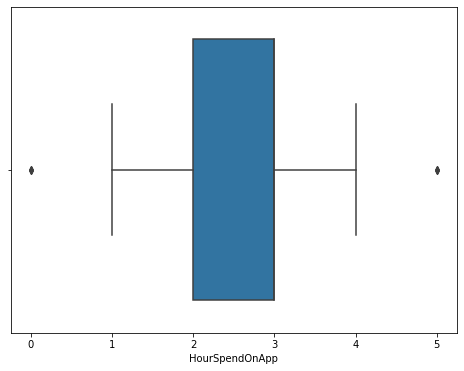

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


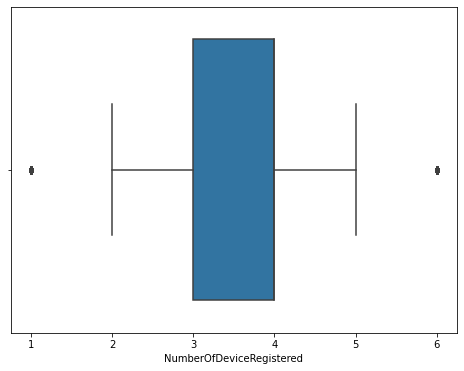

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


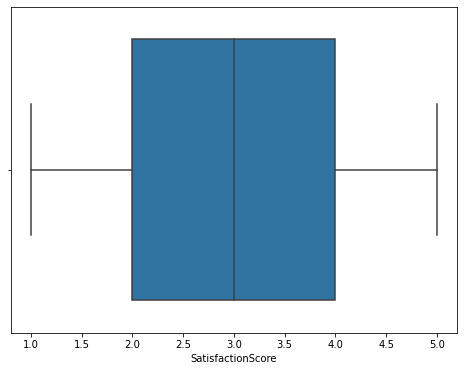

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


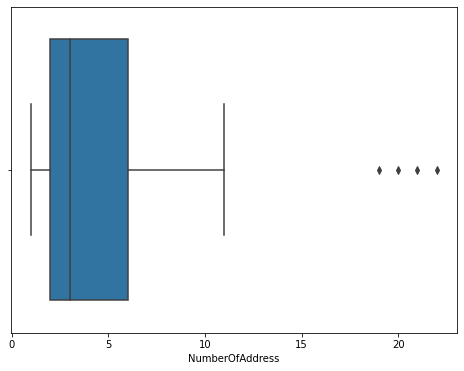

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


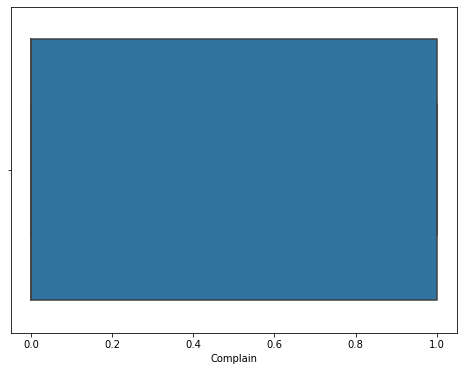

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


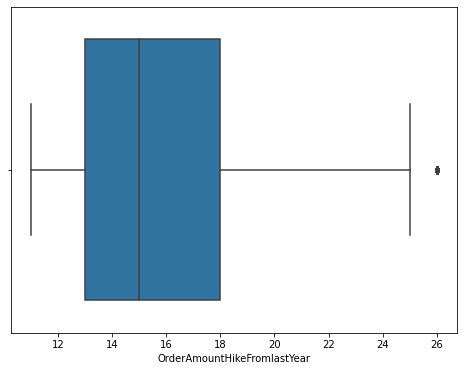

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


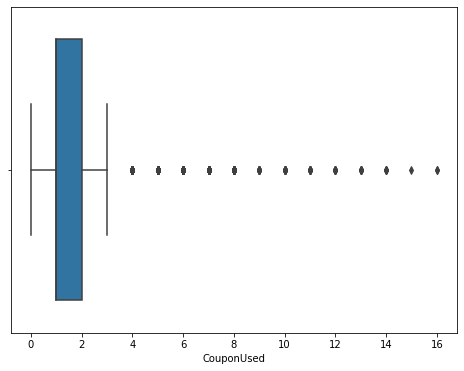

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


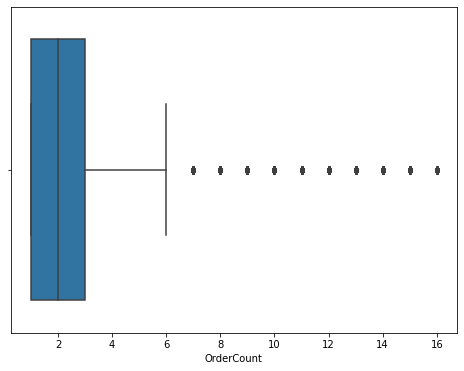

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


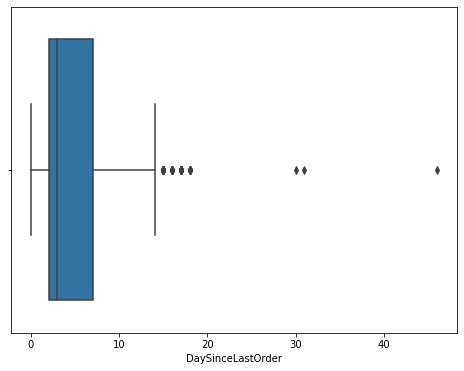

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


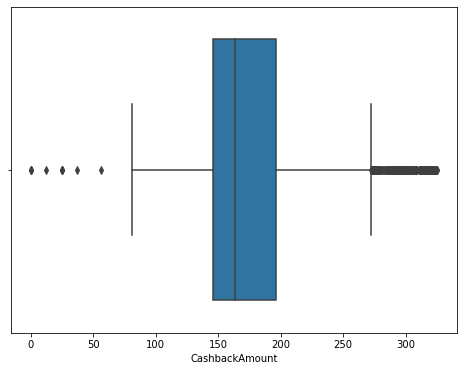

In [21]:
#Checking for outliers in numerical columns
for features in numerical_features:
    data =df.copy()
    plt.figure(figsize=(8,6))
    sns.boxplot(df[features])
    plt.xlabel(features)
    plt.show()

    There are outliers in almost all numerical columns. 
    Since, the number of outliers is large for some columns, we replace them with corresponding upper or lower limits.

In [22]:
df[numerical_features].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Tenure,5630.0,10.134103,8.357951,0.0,3.00,9.00,15.0000,61.00
WarehouseToHome,5630.0,15.566785,8.345961,5.0,9.00,14.00,20.0000,127.00
HourSpendOnApp,5630.0,2.934636,0.705528,0.0,2.00,3.00,3.0000,5.00
NumberOfDeviceRegistered,5630.0,3.688988,1.023999,1.0,3.00,4.00,4.0000,6.00
SatisfactionScore,5630.0,3.066785,1.380194,1.0,2.00,3.00,4.0000,5.00
NumberOfAddress,5630.0,4.214032,2.583586,1.0,2.00,3.00,6.0000,22.00
Complain,5630.0,0.284902,0.451408,0.0,0.00,0.00,1.0000,1.00
OrderAmountHikeFromlastYear,5630.0,15.674600,3.591058,11.0,13.00,15.00,18.0000,26.00
CouponUsed,5630.0,1.716874,1.857640,0.0,1.00,1.00,2.0000,16.00
OrderCount,5630.0,2.961812,2.879248,1.0,1.00,2.00,3.0000,16.00


In [23]:
def remove_outliers(feature):
    Q1 = np.percentile(df[feature],25,interpolation = 'midpoint')
    Q2 = np.percentile(df[feature],50,interpolation = 'midpoint')
    Q3 = np.percentile(df[feature],75,interpolation = 'midpoint')

    IQR = Q3-Q1
    lr = Q1 - (1.5*IQR)
    ur = Q3 + (1.5*IQR)
    outlier = []
    for x in df[feature]:
        if ((x < lr) or (x > ur)):
            outlier.append(x)
    print(feature)
    print('No:of outliers before: ',len(outlier))

    df[feature]=np.where(df[feature]>ur,ur,df[feature])
    df[feature]=np.where(df[feature]<lr,lr,df[feature])
    outlier2 = []
    for x in df[feature]:
        if ((x < lr) or (x > ur)):
            outlier2.append(x)
    print('No:of outliers after: ',len(outlier2))

    
for feature in numerical_features:
    remove_outliers(feature)


Tenure
No:of outliers before:  4
No:of outliers after:  0
WarehouseToHome
No:of outliers before:  2
No:of outliers after:  0
HourSpendOnApp
No:of outliers before:  6
No:of outliers after:  0
NumberOfDeviceRegistered
No:of outliers before:  397
No:of outliers after:  0
SatisfactionScore
No:of outliers before:  0
No:of outliers after:  0
NumberOfAddress
No:of outliers before:  4
No:of outliers after:  0
Complain
No:of outliers before:  0
No:of outliers after:  0
OrderAmountHikeFromlastYear
No:of outliers before:  33
No:of outliers after:  0
CouponUsed
No:of outliers before:  629
No:of outliers after:  0
OrderCount
No:of outliers before:  703
No:of outliers after:  0
DaySinceLastOrder
No:of outliers before:  62
No:of outliers after:  0
CashbackAmount
No:of outliers before:  440
No:of outliers after:  0


In [24]:
df[numerical_features].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Tenure,5630.0,10.118117,8.291334,0.0000,3.00,9.00,15.0000,33.0000
WarehouseToHome,5630.0,15.534813,8.089328,5.0000,9.00,14.00,20.0000,36.5000
HourSpendOnApp,5630.0,2.934636,0.703826,0.5000,2.00,3.00,3.0000,4.5000
NumberOfDeviceRegistered,5630.0,3.695471,0.942015,1.5000,3.00,4.00,4.0000,5.5000
SatisfactionScore,5630.0,3.066785,1.380194,1.0000,2.00,3.00,4.0000,5.0000
NumberOfAddress,5630.0,4.207993,2.555111,1.0000,2.00,3.00,6.0000,12.0000
Complain,5630.0,0.284902,0.451408,0.0000,0.00,0.00,1.0000,1.0000
OrderAmountHikeFromlastYear,5630.0,15.671670,3.582823,11.0000,13.00,15.00,18.0000,25.5000
CouponUsed,5630.0,1.440409,1.071295,0.0000,1.00,1.00,2.0000,3.5000
OrderCount,5630.0,2.520604,1.711109,1.0000,1.00,2.00,3.0000,6.0000


# 3. Encoding

In [25]:
df.select_dtypes(include=object).nunique()

PreferredLoginDevice    3
PreferredPaymentMode    7
Gender                  2
PreferedOrderCat        6
MaritalStatus           3
dtype: int64

    Since 'PreferredLoginDevice','Gender' and 'MaritalStatus' columns are neither ordinal nor having more number of 
    unique values, we encode them using one-hot encoding. And 'PreferredPaymentMode' and 'PreferedOrderCat' columns 
    are encoded using label encoding since, one-hot may introduce more number of columns.

# Label Encoding

In [26]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['PreferredPaymentMode']=le.fit_transform(df['PreferredPaymentMode'])
df['PreferedOrderCat']=le.fit_transform(df['PreferedOrderCat'])
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,4,Female,3.0,3.0,2,2.0,Single,9.0,1.0,11.0,1.0,1.0,5.0,159.93
1,50002,1,9.0,Phone,1,8.0,6,Male,3.0,4.0,3,3.0,Single,7.0,1.0,15.0,0.0,1.0,0.0,120.90
2,50003,1,9.0,Phone,1,30.0,4,Male,2.0,4.0,3,3.0,Single,6.0,1.0,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,4,Male,2.0,4.0,2,5.0,Single,8.0,0.0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,0,Male,3.0,3.0,3,5.0,Single,3.0,0.0,11.0,1.0,1.0,3.0,129.60


# One-Hot Encoding

In [27]:
df = pd.get_dummies(df, columns=['PreferredLoginDevice','Gender','MaritalStatus'])
df.head()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,PreferredPaymentMode,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,...,DaySinceLastOrder,CashbackAmount,PreferredLoginDevice_Computer,PreferredLoginDevice_Mobile Phone,PreferredLoginDevice_Phone,Gender_Female,Gender_Male,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,50001,1,4.0,3,6.0,4,3.0,3.0,2,2.0,...,5.0,159.93,0,1,0,1,0,0,0,1
1,50002,1,9.0,1,8.0,6,3.0,4.0,3,3.0,...,0.0,120.90,0,0,1,0,1,0,0,1
2,50003,1,9.0,1,30.0,4,2.0,4.0,3,3.0,...,3.0,120.28,0,0,1,0,1,0,0,1
3,50004,1,0.0,3,15.0,4,2.0,4.0,2,5.0,...,3.0,134.07,0,0,1,0,1,0,0,1
4,50005,1,0.0,1,12.0,0,3.0,3.0,3,5.0,...,3.0,129.60,0,0,1,0,1,0,0,1


# 4. Feature Reduction

    Since CustomerID doesn't contribute to modelling or EDA, that can be removed.

In [28]:
df=df.drop(['CustomerID'], axis=1)

In [29]:
df.head()

,Churn,Tenure,CityTier,WarehouseToHome,PreferredPaymentMode,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,NumberOfAddress,...,DaySinceLastOrder,CashbackAmount,PreferredLoginDevice_Computer,PreferredLoginDevice_Mobile Phone,PreferredLoginDevice_Phone,Gender_Female,Gender_Male,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,1,4.0,3,6.0,4,3.0,3.0,2,2.0,9.0,...,5.0,159.93,0,1,0,1,0,0,0,1
1,1,9.0,1,8.0,6,3.0,4.0,3,3.0,7.0,...,0.0,120.90,0,0,1,0,1,0,0,1
2,1,9.0,1,30.0,4,2.0,4.0,3,3.0,6.0,...,3.0,120.28,0,0,1,0,1,0,0,1
3,1,0.0,3,15.0,4,2.0,4.0,2,5.0,8.0,...,3.0,134.07,0,0,1,0,1,0,0,1
4,1,0.0,1,12.0,0,3.0,3.0,3,5.0,3.0,...,3.0,129.60,0,0,1,0,1,0,0,1


# 5. Standardization/Normalization

    Normalization using min-max scaler

In [30]:
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler(feature_range=(0,1))
df_scaled = pd.DataFrame(min_max.fit_transform(df),columns = df.columns)

In [31]:
df_scaled.head()

,Churn,Tenure,CityTier,WarehouseToHome,PreferredPaymentMode,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,NumberOfAddress,...,DaySinceLastOrder,CashbackAmount,PreferredLoginDevice_Computer,PreferredLoginDevice_Mobile Phone,PreferredLoginDevice_Phone,Gender_Female,Gender_Male,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,1.0,0.121212,1.0,0.031746,0.666667,0.625,0.375,0.4,0.25,0.727273,...,0.344828,0.444940,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,1.0,0.272727,0.0,0.095238,1.000000,0.625,0.625,0.6,0.50,0.545455,...,0.000000,0.252161,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,1.0,0.272727,0.0,0.793651,0.666667,0.375,0.625,0.6,0.50,0.454545,...,0.206897,0.249099,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
3,1.0,0.000000,1.0,0.317460,0.666667,0.375,0.625,0.4,1.00,0.636364,...,0.206897,0.317211,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,1.0,0.000000,0.0,0.222222,0.000000,0.625,0.375,0.6,1.00,0.181818,...,0.206897,0.295132,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


# 6. Feature Engineering

    Since the columns 'PreferredLoginDevice_Mobile Phone' and 'PreferredLoginDevice_Phone' are logically same, 
    we can merge them.

In [32]:
df=df_scaled
df['PreferredLoginDevice_Phone']=df['PreferredLoginDevice_Mobile Phone']+df['PreferredLoginDevice_Phone']

In [33]:
df_scaled.head()

,Churn,Tenure,CityTier,WarehouseToHome,PreferredPaymentMode,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,NumberOfAddress,...,DaySinceLastOrder,CashbackAmount,PreferredLoginDevice_Computer,PreferredLoginDevice_Mobile Phone,PreferredLoginDevice_Phone,Gender_Female,Gender_Male,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,1.0,0.121212,1.0,0.031746,0.666667,0.625,0.375,0.4,0.25,0.727273,...,0.344828,0.444940,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0
1,1.0,0.272727,0.0,0.095238,1.000000,0.625,0.625,0.6,0.50,0.545455,...,0.000000,0.252161,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,1.0,0.272727,0.0,0.793651,0.666667,0.375,0.625,0.6,0.50,0.454545,...,0.206897,0.249099,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
3,1.0,0.000000,1.0,0.317460,0.666667,0.375,0.625,0.4,1.00,0.636364,...,0.206897,0.317211,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,1.0,0.000000,0.0,0.222222,0.000000,0.625,0.375,0.6,1.00,0.181818,...,0.206897,0.295132,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [34]:
df=df.drop(['PreferredLoginDevice_Mobile Phone'],axis=1)

In [35]:
df.head()

,Churn,Tenure,CityTier,WarehouseToHome,PreferredPaymentMode,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,NumberOfAddress,...,OrderCount,DaySinceLastOrder,CashbackAmount,PreferredLoginDevice_Computer,PreferredLoginDevice_Phone,Gender_Female,Gender_Male,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,1.0,0.121212,1.0,0.031746,0.666667,0.625,0.375,0.4,0.25,0.727273,...,0.0,0.344828,0.444940,0.0,1.0,1.0,0.0,0.0,0.0,1.0
1,1.0,0.272727,0.0,0.095238,1.000000,0.625,0.625,0.6,0.50,0.545455,...,0.0,0.000000,0.252161,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,1.0,0.272727,0.0,0.793651,0.666667,0.375,0.625,0.6,0.50,0.454545,...,0.0,0.206897,0.249099,0.0,1.0,0.0,1.0,0.0,0.0,1.0
3,1.0,0.000000,1.0,0.317460,0.666667,0.375,0.625,0.4,1.00,0.636364,...,0.0,0.206897,0.317211,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,1.0,0.000000,0.0,0.222222,0.000000,0.625,0.375,0.6,1.00,0.181818,...,0.0,0.206897,0.295132,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [36]:
df.columns

Index(['Churn', 'Tenure', 'CityTier', 'WarehouseToHome',
       'PreferredPaymentMode', 'HourSpendOnApp', 'NumberOfDeviceRegistered',
       'PreferedOrderCat', 'SatisfactionScore', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount', 'PreferredLoginDevice_Computer',
       'PreferredLoginDevice_Phone', 'Gender_Female', 'Gender_Male',
       'MaritalStatus_Divorced', 'MaritalStatus_Married',
       'MaritalStatus_Single'],
      dtype='object')

    We can add a column AvgCashbkPerOrd using columns 'CashbackAmount' and 'OrderCount'

    df['AvgCashbkPerOrd'] = df['CashbackAmount'] / df['OrderCount']

     We tried to add a column like this. But, when dinominator=0, the value becomes infinity. And we don't know how to solve that. But, we tried.

<AxesSubplot:>

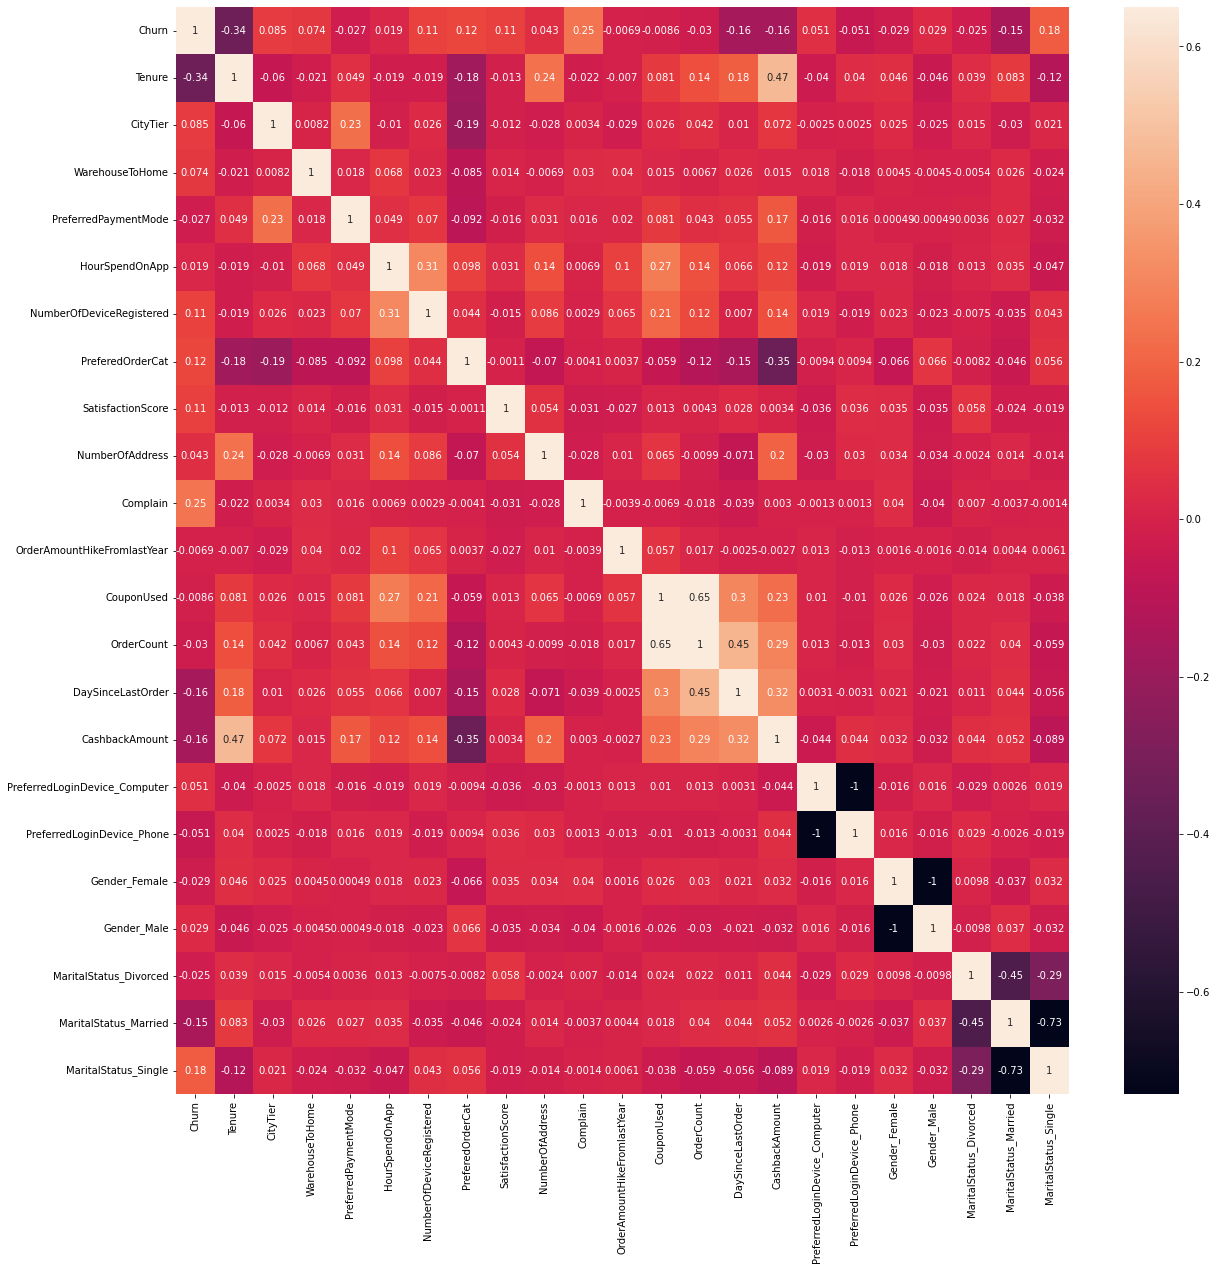

In [37]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),vmin=-0.73, vmax=0.65, annot=True)

    Since there are no strong positive or negative correlation between features. 
    Therefore, we can't remove any more features at this stage.

# Modelling

In [38]:
#Separating X and y
X=df.drop(['Churn'], axis=1)
y=df['Churn']

In [39]:
#Splitting the dataset into train data and test data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.3)
X_train.shape

(3941, 22)

In [40]:
#Creating a function for training and predicting the data.

from sklearn.metrics import f1_score
from time import time

table={'Training Time':[],'Prediction Time(Test)':[],'F1 Score(train)':[],'F1 Score(test)':[]}
comp_tab=pd.DataFrame(table)

def train_predict(clf, X_train, X_test, y_train, y_test):
    start = time()
    clf.fit(X_train, y_train)
    end = time()
    train_time=round(end-start,4)
 
    
    y_pred = clf.predict(X_train)
    f1_train=f1_score(y_train.values, y_pred, average='micro', )
    
 
    start = time()
    y_pred = clf.predict(X_test)
    end = time()
    f1_test=f1_score(y_test.values, y_pred, average='micro')
    pred_time_test=round(end-start,4)
    
    return train_time,  pred_time_test, f1_train, f1_test


    We are using these 7 common algorithms.
    1. Logistic Regression
    2. Support Vector Machine (SVM)
    3. K – Nearest Neighbour (KNN)
    4. Decision Trees
    5. Random Forest
    6. Gradient Boosting
    7. Extreme Gradient Boosting(XGB)

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
LR = LogisticRegression()
SVM = SVC()
KNN = KNeighborsClassifier()
DT = DecisionTreeClassifier()
RF = RandomForestClassifier()
GB = GradientBoostingClassifier()
XGB = XGBClassifier()
for clf in [LR, SVM, KNN, DT, RF, GB, XGB]:
    tt,pt_test,f1_train,f1_test=train_predict(clf, X_train, X_test, y_train, y_test)
    comp_tab.loc[len(comp_tab.index)] = [tt, pt_test, f1_train, f1_test]
    
comp_tab.insert(0, 'Algorithm', ['LR', 'SVM', 'KNN', 'DT', 'RF', 'GB', 'XGB']) 
comp_tab

,Algorithm,Training Time,Prediction Time(Test),F1 Score(train),F1 Score(test)
0,LR,0.0957,0.0040,0.874905,0.883955
1,SVM,1.0239,0.6502,0.916265,0.896980
2,KNN,0.0000,0.4946,0.941132,0.891060
3,DT,0.0402,0.0000,1.000000,0.947898
4,RF,1.2000,0.0702,1.000000,0.956187
5,GB,1.4098,0.0097,0.933266,0.911782
6,XGB,1.2091,0.0252,1.000000,0.970989


    Inference
    In terms of accuracy, XGB is the best for this classification. But, training time for XGB is little bit higher.

# Hyper Parameter Tuning

In [42]:
# t-tuned

# 1. Logistic Regression

In [43]:
LRt = LogisticRegression(penalty='none',solver='newton-cg')
tt,pt_test,f1_train,f1_test=train_predict(LRt, X_train, X_test, y_train, y_test)
tt,pt_test,f1_train,f1_test

(0.2385, 0.0, 0.8771885308297387, 0.8875074008288928)

    Now, accuracy improved a bit.

# 2. SVM

In [44]:
SVMt = SVC(kernel='linear')
tt,pt_test,f1_train,f1_test=train_predict(SVMt, X_train, X_test, y_train, y_test)
tt,pt_test,f1_train,f1_test

(0.6347, 0.2748, 0.8769347881248414, 0.8845470692717584)

In [45]:
SVMt = SVC(kernel='poly')
tt,pt_test,f1_train,f1_test=train_predict(SVMt, X_train, X_test, y_train, y_test)
tt,pt_test,f1_train,f1_test

(0.9852, 0.1701, 0.931743212382644, 0.9088217880402604)

In [46]:
SVMt = SVC(kernel='sigmoid')
tt,pt_test,f1_train,f1_test=train_predict(SVMt, X_train, X_test, y_train, y_test)
tt,pt_test,f1_train,f1_test

(0.8298, 0.4499, 0.7690941385435167, 0.7572528123149792)

    Accuracy improved by using kernel='poly'

# 3. KNN

In [47]:
for i in np.arange(1,22):
    KNNt = KNeighborsClassifier(n_neighbors=i)
    tt,pt_test,f1_train,f1_test=train_predict(KNNt, X_train, X_test, y_train, y_test)
    print(i,' ',f1_train,f1_test)

1   1.0 0.9402013025458852
2   0.972849530575996 0.9123741859088218
3   0.9725957878710987 0.8981645944345766
4   0.938340522709972 0.8928359976317348
5   0.9411316924638417 0.8910597986974541
6   0.9129662522202487 0.8732978093546477
7   0.9134737376300431 0.8762581409117821
8   0.8903831514843948 0.8756660746003553
9   0.895965490992134 0.8780343398460627
10   0.8837858411570667 0.8738898756660746
11   0.883024613042375 0.8703374777975134
12   0.8716061913219995 0.8685612788632326
13   0.875412331895458 0.8715216104203672
14   0.8678000507485409 0.8614564831261101
15   0.8705912205024106 0.866785079928952
16   0.8637401674701852 0.8644168146832445
17   0.8662775945191575 0.866785079928952
18   0.8609489977163156 0.8632326820603907
19   0.8622177112408018 0.8644168146832445
20   0.8594265414869322 0.8632326820603907
21   0.8596802841918295 0.8614564831261101


    For parameter n-neighbors, 1 gives best aacuracy.

# 4. Decision Tree

In [48]:
DTt = DecisionTreeClassifier(criterion='entropy')
tt,pt_test,f1_train,f1_test=train_predict(DTt, X_train, X_test, y_train, y_test)
f1_train,f1_test

(1.0, 0.9591474245115453)

In [49]:
DTt = DecisionTreeClassifier(max_features='sqrt')
tt,pt_test,f1_train,f1_test=train_predict(DTt, X_train, X_test, y_train, y_test)
f1_train,f1_test

(1.0, 0.9342806394316163)

In [50]:
DTt = DecisionTreeClassifier(max_features='log2')
tt,pt_test,f1_train,f1_test=train_predict(DTt, X_train, X_test, y_train, y_test)
f1_train,f1_test

(1.0, 0.9360568383658969)

In [51]:
DTt = DecisionTreeClassifier(max_features='sqrt',criterion='entropy')
tt,pt_test,f1_train,f1_test=train_predict(DTt, X_train, X_test, y_train, y_test)
f1_train,f1_test

(1.0, 0.9123741859088218)

    Therefore, best accuracy is for criterion='entropy'

# 5. Random Forest

In [52]:
for i in np.arange(1,21):
    RFt = RandomForestClassifier(max_features=1)
    tt,pt_test,f1_train,f1_test=train_predict(RFt, X_train, X_test, y_train, y_test)
    print(i, ' ',f1_train,f1_test)

1   1.0 0.9283599763173476
2   1.0 0.9283599763173476
3   1.0 0.9283599763173476
4   1.0 0.9307282415630551
5   1.0 0.9283599763173476
6   1.0 0.9271758436944938
7   1.0 0.9354647720544701
8   1.0 0.9248075784487862
9   1.0 0.9336885731201895
10   1.0 0.9289520426287744
11   1.0 0.9242155121373594
12   1.0 0.9319123741859088
13   1.0 0.9289520426287744
14   1.0 0.9289520426287744
15   1.0 0.9283599763173476
16   1.0 0.9360568383658969
17   1.0 0.9265837773830669
18   1.0 0.9265837773830669
19   1.0 0.9265837773830669
20   1.0 0.9271758436944938


In [53]:
RFt = RandomForestClassifier(max_features='log2')
tt,pt_test,f1_train,f1_test=train_predict(RFt, X_train, X_test, y_train, y_test)
f1_train,f1_test

(1.0, 0.9573712255772646)

In [54]:
RFt = RandomForestClassifier(n_estimators=10)
tt,pt_test,f1_train,f1_test=train_predict(RFt, X_train, X_test, y_train, y_test)
f1_train,f1_test

(0.9959401167216443, 0.9425695677915926)

In [55]:
RFt = RandomForestClassifier(n_estimators=1000, max_features='log2')
tt,pt_test,f1_train,f1_test=train_predict(RFt, X_train, X_test, y_train, y_test)
f1_train,f1_test

(1.0, 0.9544108940201302)

    Therefore, the dafault parameters gives the best aacuracy.

# 6. Gradient Boosting

In [56]:
GBt = GradientBoostingClassifier(n_estimators=1000)
tt,pt_test,f1_train,f1_test=train_predict(GBt, X_train, X_test, y_train, y_test)
f1_train,f1_test

(0.9997462572951028, 0.9650680876258141)

In [57]:
GBt = GradientBoostingClassifier(learning_rate=0.01,n_estimators=1000)
tt,pt_test,f1_train,f1_test=train_predict(GBt, X_train, X_test, y_train, y_test)
f1_train,f1_test

(0.9314894696777468, 0.9105979869745412)

    Therefore, accuracy improved with parameter n_estimators=1000

# 7. Extreme Gradient Boosting

In [58]:
clf

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [59]:
XGBt = XGBClassifier(n_estimators=1000)
tt,pt_test,f1_train,f1_test=train_predict(XGBt, X_train, X_test, y_train, y_test)
f1_train,f1_test

(1.0, 0.9739490822972173)

    Accuracy improved a bit eventhough it is the best among all other algorithms.